In [1]:
import joblib
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 120)

In [2]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred);
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [3]:
tableToRead = 'maint_order' # maint_order maint_req
columnToClassify = 'priority'

In [4]:
df_table_full = pd.read_csv("./base_manusis/preprocess/"+tableToRead+"_etl.csv",low_memory=False)

In [5]:
df_backup = df_table_full.copy()

In [6]:
df_table_full.groupby('priority').count()[['area_id']]

,area_id
priority,
1,141982
2,19733
3,17652
4,9092
5,4546


In [ ]:
def plot_freq(df, col, top_classes=20):
    """
    :param df: dataframe
    :param col: list of label string
    :param top_classes: (integer) Plot top labels only.
    """
    sns.set_style('whitegrid')

    col = col
    data = df[~df[col].isnull().any(axis=1)]
    data = data.set_index(col)
    
    # Check out the frequency over each concept.
    freq = pd.DataFrame({
            'freq': data.index.value_counts(normalize=True),
            'count': data.index.value_counts(normalize=False)},
            index=data.index.value_counts(normalize=True).index)
    print('Frequency(Top {})...'.format(top_classes))
    freq = freq[:top_classes]
    display(freq)
    
    # Plot bar chart.
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    _ = freq.plot(y='freq', kind='bar', ax=ax, legend=False, colormap='Set2')
    _ = ax.set_ylabel('frequency', fontsize='x-large')
    _ = ax.set_xticklabels(freq.index.values, rotation=40, ha='right')
    _ = ax.set_title('Frequency over Each Class', fontsize='x-large')

In [41]:
sns.set_style('whitegrid')

In [44]:
Test_df = df_table_full.groupby(['first_loc_id']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)

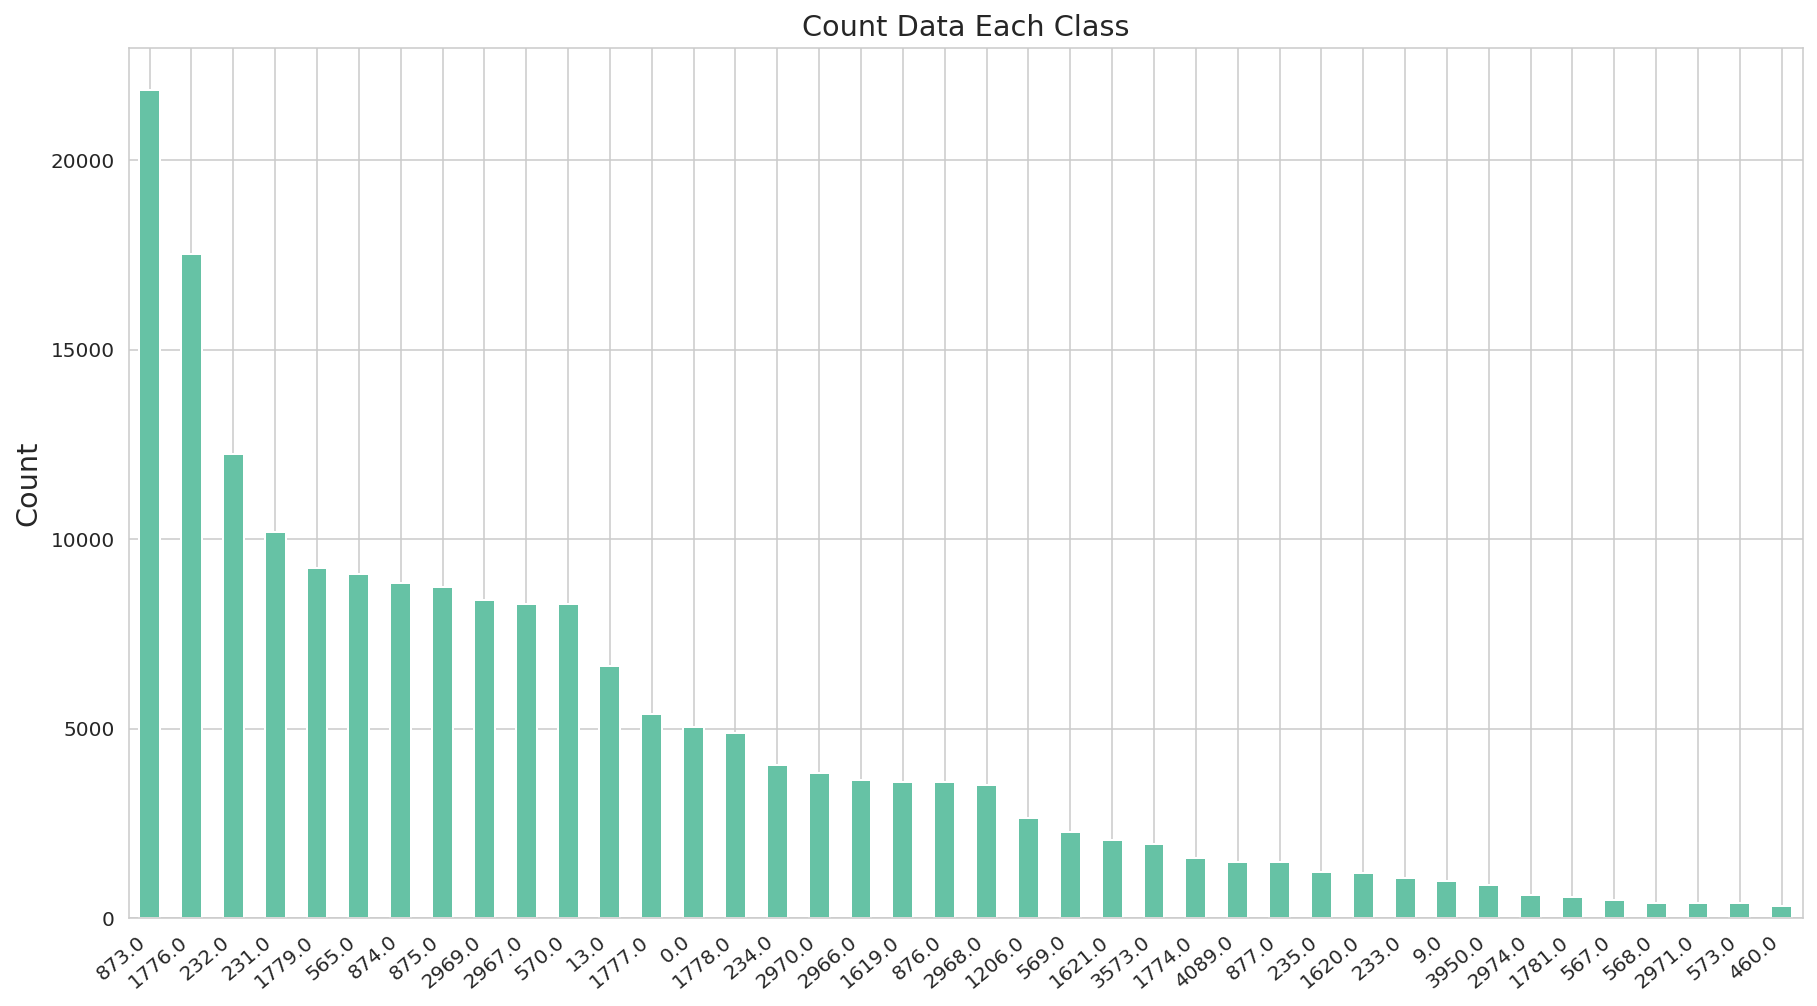

In [53]:
final_df = Test_df[:40]

fig, ax = plt.subplots(1,1, figsize=(15,8))
_ = final_df.plot(y='count', kind='bar', ax=ax, legend=False, colormap='Set2')
_ = ax.set_ylabel('Count', fontsize='x-large')
_ = ax.set_xticklabels(final_df.first_loc_id.values, rotation=40, ha='right')
_ = ax.set_title('Count Data Each Class', fontsize='x-large')

In [36]:
df_table_full.head()

,is_perform_failure_analysis,cause_type_id,is_failure_analysis,first_loc_id,area_id,asset_part_id,cause_feature_id,pillar_id,cause_countermeasure_id,damage_type_id,operator_team_id,cause_structure_action_id,operator_id,tag_number,probability_of_failure_id,maint_action_id,detection_of_failure_id,maint_order_status_id,is_security_item,has_resupply_general_req,cost_center_id,asset_part_child_id,breakdown_typology_id,maint_service_nature_id,asset_group_id,maint_order_activities_type,maint_failure_id,tag_id,is_approved,component_id,second_loc_id,needs_rescheduling,is_scheduled,logged_user_id,employee_team_id,is_sistematic,maint_cause_id,maint_service_type_id,maint_possible_cause_id,company_id,third_loc_id,employee_id,priority,asset_id,need_asset_stop,severity_of_failure_id,maint_plan_id
0,0,0.0,0,349.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,38.0,0.0,0.0,0.0,113.0,1,0.0,0.0,0,0.0,350.0,0.0,1,20.0,5.0,0,0.0,4,0.0,3,0.0,0.0,1,7399.0,0,0.0,0.0
1,0,0.0,0,349.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,38.0,0.0,0.0,0.0,113.0,1,0.0,0.0,0,0.0,350.0,0.0,1,20.0,0.0,0,0.0,4,0.0,3,0.0,0.0,1,7399.0,0,0.0,0.0
2,0,0.0,0,13.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,15.0,0.0,0.0,4.0,59.0,1,0.0,0.0,0,0.0,18.0,0.0,0,15.0,3.0,0,0.0,1,0.0,2,106.0,5.0,3,379.0,0,0.0,0.0
3,0,0.0,0,231.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,22.0,0.0,0.0,110.0,112.0,1,0.0,0.0,0,0.0,238.0,0.0,0,48.0,0.0,0,0.0,4,0.0,2,326.0,0.0,1,7161.0,0,0.0,0.0
4,0,0.0,0,231.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,22.0,0.0,0.0,110.0,112.0,1,0.0,0.0,0,0.0,239.0,0.0,0,48.0,0.0,0,0.0,4,0.0,2,335.0,0.0,1,7191.0,0,0.0,0.0


In [55]:
df_table_full.columns

Index(['is_perform_failure_analysis', 'cause_type_id', 'is_failure_analysis',
       'first_loc_id', 'area_id', 'asset_part_id', 'cause_feature_id',
       'pillar_id', 'cause_countermeasure_id', 'damage_type_id',
       'operator_team_id', 'cause_structure_action_id', 'operator_id',
       'tag_number', 'probability_of_failure_id', 'maint_action_id',
       'detection_of_failure_id', 'maint_order_status_id', 'is_security_item',
       'has_resupply_general_req', 'cost_center_id', 'asset_part_child_id',
       'breakdown_typology_id', 'maint_service_nature_id', 'asset_group_id',
       'maint_order_activities_type', 'maint_failure_id', 'tag_id',
       'is_approved', 'component_id', 'second_loc_id', 'needs_rescheduling',
       'is_scheduled', 'logged_user_id', 'employee_team_id', 'is_sistematic',
       'maint_cause_id', 'maint_service_type_id', 'maint_possible_cause_id',
       'company_id', 'third_loc_id', 'employee_id', 'priority', 'asset_id',
       'need_asset_stop', 'severity_of

In [54]:
for column in df_table_full.columns:
    print(column)
    display(df_table_full.groupby([column]).size().reset_index(name='count').sort_values(by=['count'],ascending=False))

is_perform_failure_analysis


,is_perform_failure_analysis,count
0,0,192964
1,1,41


cause_type_id


,cause_type_id,count
0,0.0,192725
9,47.0,79
4,42.0,71
6,44.0,49
5,43.0,29
10,48.0,19
7,45.0,16
8,46.0,10
3,24.0,4
1,14.0,1


is_failure_analysis


,is_failure_analysis,count
0,0,184090
1,1,8915


first_loc_id


,first_loc_id,count
33,873.0,21869
48,1776.0,17519
5,232.0,12238
4,231.0,10176
51,1779.0,9234
14,565.0,9072
34,874.0,8851
35,875.0,8733
58,2969.0,8398
56,2967.0,8300


area_id


,area_id,count
8,13,47355
11,16,43488
12,17,29848
2,4,29380
7,12,22788
0,2,7740
10,15,7346
9,14,3120
5,10,1081
6,11,815


asset_part_id


,asset_part_id,count
0,0.0,179900
686,8860.0,239
1835,11869.0,153
731,8989.0,127
33,2887.0,119
2160,15197.0,119
1985,12269.0,96
2654,21205.0,84
1445,10823.0,75
2650,21140.0,70


cause_feature_id


,cause_feature_id,count
0,0.0,192725
1,40.0,140
3,42.0,80
2,41.0,60


pillar_id


,pillar_id,count
0,0.0,192967
1,6.0,16
3,38.0,16
2,36.0,4
4,39.0,2


cause_countermeasure_id


,cause_countermeasure_id,count
0,0.0,192731
2,26.0,43
14,38.0,37
11,35.0,33
4,28.0,26
7,31.0,22
10,34.0,19
12,36.0,17
5,29.0,14
3,27.0,13


damage_type_id


,damage_type_id,count
0,0.0,189719
2,2.0,2215
1,1.0,1071


operator_team_id


,operator_team_id,count
0,0.0,188913
38,100.0,1178
28,90.0,681
32,94.0,347
40,104.0,322
13,43.0,316
5,30.0,248
10,40.0,171
30,92.0,136
29,91.0,100


cause_structure_action_id


,cause_structure_action_id,count
0,0.0,192984
5,11.0,7
6,12.0,3
7,14.0,3
1,1.0,2
3,3.0,2
2,2.0,1
4,9.0,1
8,15.0,1
9,16.0,1


operator_id


,operator_id,count
0,0.0,192998
1,834.0,3
2,847.0,1
3,917.0,1
4,956.0,1
5,958.0,1


tag_number


,tag_number,count
0,0.0,192927
62,2972.0,2
28,2784.0,2
39,2799.0,2
1,1.0,2
70,7315.0,1
53,2961.0,1
40,2800.0,1
41,2801.0,1
42,2802.0,1


probability_of_failure_id


,probability_of_failure_id,count
0,0.0,193004
1,1.0,1


maint_action_id


,maint_action_id,count
0,0.0,192699
46,181.0,72
24,41.0,68
48,193.0,24
4,5.0,13
5,6.0,12
18,27.0,10
19,30.0,9
16,24.0,9
1,1.0,6


detection_of_failure_id


,detection_of_failure_id,count
0,0.0,193004
1,1.0,1


maint_order_status_id


,maint_order_status_id,count
2,3,151502
3,4,21403
0,1,16241
7,8,2669
1,2,572
6,7,283
4,5,93
10,11,70
9,10,61
8,9,47


is_security_item


,is_security_item,count
0,0,191699
1,1,1306


has_resupply_general_req


,has_resupply_general_req,count
0,0,192929
1,1,76


cost_center_id


,cost_center_id,count
80,171.0,13198
2,2.0,10546
10,22.0,8645
88,179.0,8409
165,283.0,8199
136,240.0,6984
120,224.0,6488
11,23.0,5505
0,0.0,5016
81,172.0,4773


asset_part_child_id


,asset_part_child_id,count
0,0.0,190561
51,4362.0,89
184,4553.0,44
216,4736.0,37
179,4548.0,30
96,4429.0,30
45,4355.0,29
569,21167.0,28
52,4363.0,24
31,4333.0,22


breakdown_typology_id


,breakdown_typology_id,count
0,0.0,192722
1,15.0,155
3,17.0,116
5,19.0,5
2,16.0,3
6,20.0,2
4,18.0,1
7,21.0,1


maint_service_nature_id


,maint_service_nature_id,count
0,0.0,105211
3,110.0,38537
4,111.0,29987
9,116.0,9784
7,114.0,2481
8,115.0,1667
6,113.0,1408
14,121.0,1284
11,118.0,984
5,112.0,762


asset_group_id


,asset_group_id,count
926,2171.0,17266
233,493.0,10787
87,124.0,9307
0,0.0,4999
209,460.0,4394
655,1541.0,4249
83,112.0,3996
216,468.0,3806
320,590.0,3445
394,743.0,3366


maint_order_activities_type


,maint_order_activities_type,count
0,1,125740
1,2,67265


maint_failure_id


,maint_failure_id,count
0,0.0,192460
56,131.0,74
16,19.0,73
1,1.0,52
28,58.0,43
37,81.0,31
73,304.0,28
20,31.0,23
11,12.0,21
43,93.0,12


tag_id


,tag_id,count
0,0.0,192971
28,91.0,2
26,89.0,2
17,78.0,1
31,128.0,1
30,119.0,1
29,96.0,1
27,90.0,1
25,88.0,1
24,87.0,1


is_approved


,is_approved,count
0,0,192933
1,1,72


component_id


,component_id,count
0,0.0,190957
123,1142.0,27
132,1285.0,23
551,6638.0,22
415,5443.0,20
93,874.0,20
426,5458.0,17
529,6586.0,15
913,71455.0,12
422,5453.0,10


second_loc_id


,second_loc_id,count
67,880.0,12945
207,1831.0,6951
179,1800.0,6426
15,246.0,5716
11,242.0,5528
127,1387.0,5464
75,888.0,5198
0,0.0,5048
7,238.0,4793
8,239.0,4790


needs_rescheduling


,needs_rescheduling,count
0,0.0,191521
1,1.0,1484


is_scheduled


,is_scheduled,count
0,0,178857
1,1,14148


logged_user_id


,logged_user_id,count
0,0.0,30328
1,1.0,15969
100,709.0,6808
136,755.0,6386
29,302.0,5633
47,420.0,5140
85,566.0,4153
8,27.0,4150
171,1077.0,3819
137,756.0,3673


employee_team_id


,employee_team_id,count
0,0.0,104112
16,40.0,18289
18,42.0,8802
17,41.0,8706
2,3.0,5414
50,92.0,5001
52,94.0,4261
19,43.0,4147
10,31.0,3594
9,30.0,3526


is_sistematic


,is_sistematic,count
0,0,128571
1,1,64434


maint_cause_id


,maint_cause_id,count
0,0.0,192631
27,41.0,73
44,136.0,39
1,1.0,31
67,318.0,23
4,5.0,14
33,65.0,13
61,214.0,12
21,31.0,11
18,27.0,10


maint_service_type_id


,maint_service_type_id,count
0,1,64366
6,97,55629
3,4,48684
5,60,10504
1,2,4517
8,113,4211
7,111,1950
10,116,962
9,115,852
4,8,573


maint_possible_cause_id


,maint_possible_cause_id,count
0,0.0,192730
182,4371.0,1
188,4382.0,1
187,4381.0,1
186,4379.0,1
185,4377.0,1
184,4375.0,1
183,4373.0,1
181,4368.0,1
173,4352.0,1


company_id


,company_id,count
0,2,192997
1,3,8


third_loc_id


,third_loc_id,count
0,0.0,6550
908,1910.0,6169
1381,2676.0,5577
1844,3885.0,3673
476,1015.0,3127
1653,3413.0,2866
1647,3269.0,2086
557,1111.0,1725
1605,3144.0,1634
1224,2454.0,1526


employee_id


,employee_id,count
0,0.0,100857
61,87.0,3956
65,92.0,3866
64,90.0,3128
60,85.0,2693
25,30.0,2239
91,160.0,2152
3,6.0,1983
83,130.0,1880
18,22.0,1879


priority


,priority,count
0,1,141982
1,2,19733
2,3,17652
3,4,9092
4,5,4546


asset_id


,asset_id,count
4358,22914.0,6117
0,0.0,4999
7696,74442.0,3673
2863,12423.0,1915
4373,22929.0,1502
4366,22922.0,1280
6961,34306.0,1248
4380,22938.0,1150
4362,22918.0,1090
6564,33088.0,1008


need_asset_stop


,need_asset_stop,count
0,0,174325
1,1,18680


severity_of_failure_id


,severity_of_failure_id,count
0,0.0,193004
1,1.0,1


maint_plan_id


,maint_plan_id,count
0,0.0,128573
3121,9421.0,1398
1842,7857.0,1330
3542,9939.0,1112
3,206.0,1089
1840,7855.0,1021
5,211.0,793
3450,9787.0,763
2,205.0,755
4,210.0,746


In [7]:
min_value = min(list(df_table_full.groupby(['priority']).size()))

In [8]:
priority_values = list(df_table_full.priority.unique())

In [9]:
list_df = []
for i in priority_values:
    df_aux = df_table_full.query(f"priority=={str(i)}")
    df_aux = df_aux.sample(frac=1).reset_index(drop=True)
    df_aux = df_aux[:min_value]
    list_df.append(df_aux)

In [10]:
for t in list_df:
    print(t.shape)

(4546, 47)
(4546, 47)
(4546, 47)
(4546, 47)
(4546, 47)


In [11]:
df_table = pd.concat(list_df)

In [12]:
df_table.shape

(22730, 47)

In [13]:
print(df_table[columnToClassify].unique())
print(df_table.shape)

[1 3 5 2 4]
(22730, 47)


In [14]:
previsores = df_table.drop(columnToClassify, axis=1)
classe = df_table[[columnToClassify]]

previsores_names = list(df_table.drop(columnToClassify, axis=1).columns)
class_names = df_table[columnToClassify].unique().astype(str)

In [15]:
_,cols = previsores.shape

# Transforma features em códigos

In [16]:
from sklearn.preprocessing import LabelEncoder

labelencoder_previsores = LabelEncoder()
for i in previsores.columns:
    previsores[i] = labelencoder_previsores.fit_transform(previsores[i])

labelencoder_classe = LabelEncoder()
classe[columnToClassify] = labelencoder_classe.fit_transform(classe[columnToClassify])

/home/gregory/anaconda3/envs/pibiti/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
previsores.shape

(22730, 46)

In [18]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# previsores = scaler.fit_transform(previsores)

In [19]:
from sklearn.model_selection import train_test_split

previsores_train, previsores_test, classe_train, classe_test = train_test_split(previsores, 
                                                                                classe,
                                                                                test_size=0.30,
                                                                                random_state=0)

In [20]:
# from sklearn.naive_bayes import GaussianNB
# classificador = GaussianNB()

from sklearn.tree import DecisionTreeClassifier, export
classificador = DecisionTreeClassifier(criterion='entropy')

# from sklearn.svm import SVC
# classificador = SVC(kernel='rbf',random_state=1,gamma='auto')

# from sklearn.neighbors import KNeighborsClassifier
# classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=4)

classificador.fit(previsores_train,classe_train)
previsoes = classificador.predict(previsores_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

precisao = accuracy_score(classe_test,previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('precision:', precisao)

precision: 0.7537762135210442


Normalized confusion matrix


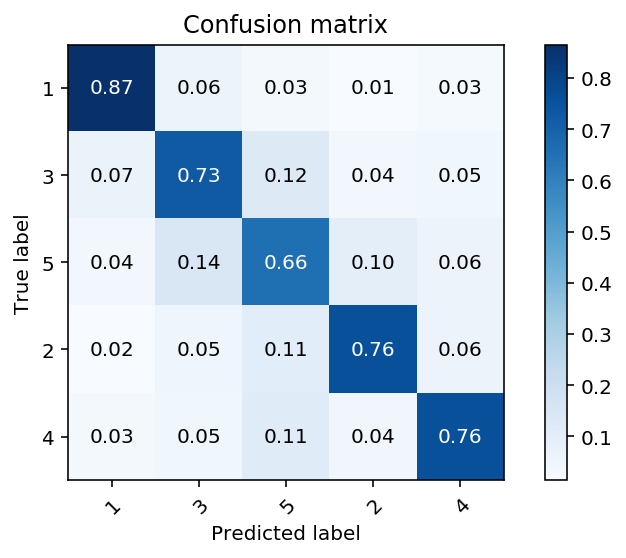

In [22]:
%config InlineBackend.figure_format ='retina'
np.set_printoptions(precision=4)
# Plot non-normalized confusion matrix
plot_confusion_matrix(classe_test, previsoes, classes=class_names,normalize=True,title='Confusion matrix' )

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=10);
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(previsores_train,classe_train);
# y_pred=rfc.predict(X_test)

In [ ]:
feature_imp = pd.Series(rfc.feature_importances_,index=previsores_names).sort_values(ascending=False);

In [ ]:
plt.rcParams['figure.figsize']=(10,10)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# OLD START

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# onehotencoder = OneHotEncoder(categorical_features=[3])
# previsores_test = onehotencoder.fit_transform(previsores).toarray()

# cols_onehot = []
# for i in range(0,cols):
#     if len(np.unique(previsores[:, i]))>2 :
#         cols_onehot.append(i)

# onehotencoder = OneHotEncoder(categorical_features=cols_onehot,sparse=False)
# previsores = onehotencoder.fit_transform(previsores).toarray()

# OLD END

# Parse TXT

In [ ]:
import os
import re
import pandas as pd

path = "./base_manusis/evaluation/records_validate.txt"

with open(path, 'r', encoding="UTF-16", errors='ignore') as f:
    contents = f.readlines()

test_list = []

for data in contents:
    if len(re.findall(r'\{([^]]+)\}',data)) > 0:
        pass
    elif 'description' in data:
        pass
    else:
        if ':' in data:
            aux_spl = data.split(':')
            
            aux_spl_2 = ':'.join(aux_spl[1:])
            aux_spl_2 = aux_spl_2.replace("\n",",\n")
            
            text = f'"{aux_spl[0]}":{aux_spl_2}'
            test_list.append(text)
        else:
            test_list.append(data)
            
json_result = ''.join(test_list)
json_result = json_result.replace(',\n}','\n}')
json_result = "["+json_result+"]"
json_result = json_result.replace('null','None')
json_result = json_result.replace('false','False')
json_result = json_result.replace('true','True')

# with open("./base_manusis/evaluation/records_etl.json",'w') as f:
#     f.writelines(json_result)
    
# with open('./base_manusis/evaluation/records_etl.json', 'r', errors='ignore') as f:
#     contents2 = f.read()

json_list = eval(json_result)

# Test JSON Modelo

In [ ]:
df_eval = pd.DataFrame(json_list)
df_eval = df_eval[df_table.columns]

def correc(x):
    if x in [None,False,np.NaN]:
        return 0
    elif x in [True]:
        return 1
    else:
        return x

for col in df_table.columns:
    df_eval[col] = df_eval[col].apply(correc)
    
df_eval.head()

In [ ]:
previsores_eval = df_eval.drop(columnToClassify, axis=1)
classe_eval = df_eval[[columnToClassify]]

previsores_names_eval = list(df_eval.drop(columnToClassify, axis=1).columns)
class_names_eval = df_eval[columnToClassify].unique().astype(str)

In [ ]:
_,cols = previsores_eval.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_previsores = LabelEncoder()
for i in previsores_eval.columns:
    previsores_eval[i] = labelencoder_previsores.fit_transform(previsores_eval[i])

labelencoder_classe = LabelEncoder()
classe_eval[columnToClassify] = labelencoder_classe.fit_transform(classe_eval[columnToClassify])

In [ ]:
previsoes_eval = classificador.predict(previsores_eval)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

precisao_eval = accuracy_score(classe_eval,previsoes_eval)
matriz_eval = confusion_matrix(classe_eval,previsoes_eval)

print('precision:', precisao_eval)

# With CSV Evaluation

In [23]:
import pandas as pd

pathFile = './base_manusis/evaluation/maint_order.csv'

df_eval = pd.read_csv(pathFile, delimiter=';')

print('before',df_eval.shape)

df_eval = df_eval[df_table.columns]

print('after',df_eval.shape)

df_eval = df_eval.fillna(0)

before (100, 118)
after (100, 47)


In [24]:
df_eval.loc[[1]]

,is_perform_failure_analysis,cause_type_id,is_failure_analysis,first_loc_id,area_id,asset_part_id,cause_feature_id,pillar_id,cause_countermeasure_id,damage_type_id,operator_team_id,cause_structure_action_id,operator_id,tag_number,probability_of_failure_id,maint_action_id,detection_of_failure_id,maint_order_status_id,is_security_item,has_resupply_general_req,cost_center_id,asset_part_child_id,breakdown_typology_id,maint_service_nature_id,asset_group_id,maint_order_activities_type,maint_failure_id,tag_id,is_approved,component_id,second_loc_id,needs_rescheduling,is_scheduled,logged_user_id,employee_team_id,is_sistematic,maint_cause_id,maint_service_type_id,maint_possible_cause_id,company_id,third_loc_id,employee_id,priority,asset_id,need_asset_stop,severity_of_failure_id,maint_plan_id
1,0,0.0,0,2969,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,283,0.0,0.0,0.0,2536,1,0.0,0.0,0,0.0,3057,0.0,0,748.0,0.0,0,0.0,4,0.0,2,3486,0.0,1,32897,0,0.0,0.0


In [25]:
previsores_eval = df_eval.drop(columnToClassify, axis=1)
classe_eval = df_eval[[columnToClassify]]

previsores_names_eval = list(df_eval.drop(columnToClassify, axis=1).columns)
class_names_eval = df_eval[columnToClassify].unique().astype(str)

In [26]:
_,cols = previsores_eval.shape

In [27]:
from sklearn.preprocessing import LabelEncoder

labelencoder_previsores = LabelEncoder()
for i in previsores_eval.columns:
    previsores_eval[i] = labelencoder_previsores.fit_transform(previsores_eval[i])

labelencoder_classe = LabelEncoder()
classe_eval[columnToClassify] = labelencoder_classe.fit_transform(classe_eval[columnToClassify])

/home/gregory/anaconda3/envs/pibiti/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
previsoes_eval = classificador.predict(previsores_eval)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

precisao_eval = accuracy_score(classe_eval,previsoes_eval)
matriz_eval = confusion_matrix(classe_eval,previsoes_eval)

print('precision:', precisao_eval)

precision: 0.46


In [30]:
classe_eval.priority.unique()

array([0, 1, 2])

In [31]:
set(previsoes_eval)

{0, 1, 2, 4}